In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import preprocessing as pre
import sklearn

from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 100)

# Parameters

In [2]:
file_path_desc = "D:/Data_challenge/columns_description.xlsx"
file_path_data = "D:/Data_challenge/match_data.csv"

# Data input

In [73]:
data = pd.read_csv(file_path_data)
data = data[data['odds_home_team_win']!=0].reset_index(drop = True)
data

,match_id,season,div,odds_home_team_win,odds_draw,odds_away_team_win,home_team_match_nr,home_team_goal_roll1_sum,home_team_goal_roll2_sum,home_team_goal_roll3_sum,...,odds_away_team_draw_roll4_mean,odds_away_team_defeat_roll1_mean,odds_away_team_defeat_roll2_mean,odds_away_team_defeat_roll3_mean,odds_away_team_defeat_roll4_mean,away_team_point_mean,away_team_expected_point_mean,home_win_flag,draw_flag,away_win_flag
0,0,2008-2009,div0,1.73,3.50,5.00,5,3,7,8,...,3.825,11.00,7.665,6.377,5.908,0.500,3.000,0,0,1
1,1,2008-2009,div0,1.25,5.50,12.00,7,0,2,5,...,3.582,2.10,2.250,2.833,2.475,0.333,0.000,0,1,0
2,2,2008-2009,div0,1.57,3.80,5.75,9,1,4,4,...,3.525,6.75,4.275,3.883,3.638,0.750,1.500,1,0,0
3,3,2008-2009,div0,1.17,7.00,15.00,11,2,6,7,...,3.975,4.20,2.750,2.333,2.550,0.600,0.000,1,0,0
4,4,2008-2009,div0,1.17,7.00,15.00,14,2,4,7,...,3.925,3.10,2.175,2.050,2.015,0.833,0.000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64154,64395,2021-2022,div18,3.80,3.71,1.90,30,0,1,3,...,3.558,5.04,3.695,3.337,3.043,0.929,0.429,0,0,1
64155,64396,2021-2022,div18,3.62,3.42,2.04,32,0,0,0,...,3.268,3.03,2.585,2.740,2.755,1.000,0.200,0,0,1
64156,64397,2021-2022,div18,5.51,4.06,1.59,34,0,0,0,...,3.625,4.19,3.860,3.943,3.458,1.312,0.750,0,0,1
64157,64398,2021-2022,div18,3.83,3.76,1.87,36,1,3,3,...,3.738,2.04,1.800,1.883,1.915,0.412,0.000,0,0,1


# EDA

In [74]:
data.shape

(64159, 167)

In [75]:
data.columns

Index(['match_id', 'season', 'div', 'odds_home_team_win', 'odds_draw',
       'odds_away_team_win', 'home_team_match_nr', 'home_team_goal_roll1_sum',
       'home_team_goal_roll2_sum', 'home_team_goal_roll3_sum',
       ...
       'odds_away_team_draw_roll4_mean', 'odds_away_team_defeat_roll1_mean',
       'odds_away_team_defeat_roll2_mean', 'odds_away_team_defeat_roll3_mean',
       'odds_away_team_defeat_roll4_mean', 'away_team_point_mean',
       'away_team_expected_point_mean', 'home_win_flag', 'draw_flag',
       'away_win_flag'],
      dtype='object', length=167)

In [76]:
print("Home win count: " + str(sum(data.home_win_flag)))
print("Draw count: " + str(sum(data.draw_flag)))
print("Away win count: " + str(sum(data.away_win_flag)))

Home win count: 28211
Draw count: 16796
Away win count: 19152


# Data preparation

In [77]:
data['home_win_prob'] = 1/data['odds_home_team_win']
data['draw_prob'] = 1/data['odds_draw']
data['away_win_prob'] = 1/data['odds_away_team_win']
data['delta_prob'] = data['home_win_prob'] - data['away_win_prob'] 

#data = data[data['draw_prob']<0.37].reset_index()
data


,match_id,season,div,odds_home_team_win,odds_draw,odds_away_team_win,home_team_match_nr,home_team_goal_roll1_sum,home_team_goal_roll2_sum,home_team_goal_roll3_sum,...,odds_away_team_defeat_roll4_mean,away_team_point_mean,away_team_expected_point_mean,home_win_flag,draw_flag,away_win_flag,home_win_prob,draw_prob,away_win_prob,delta_prob
0,0,2008-2009,div0,1.73,3.50,5.00,5,3,7,8,...,5.908,0.500,3.000,0,0,1,0.578035,0.285714,0.200000,0.378035
1,1,2008-2009,div0,1.25,5.50,12.00,7,0,2,5,...,2.475,0.333,0.000,0,1,0,0.800000,0.181818,0.083333,0.716667
2,2,2008-2009,div0,1.57,3.80,5.75,9,1,4,4,...,3.638,0.750,1.500,1,0,0,0.636943,0.263158,0.173913,0.463030
3,3,2008-2009,div0,1.17,7.00,15.00,11,2,6,7,...,2.550,0.600,0.000,1,0,0,0.854701,0.142857,0.066667,0.788034
4,4,2008-2009,div0,1.17,7.00,15.00,14,2,4,7,...,2.015,0.833,0.000,1,0,0,0.854701,0.142857,0.066667,0.788034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64154,64395,2021-2022,div18,3.80,3.71,1.90,30,0,1,3,...,3.043,0.929,0.429,0,0,1,0.263158,0.269542,0.526316,-0.263158
64155,64396,2021-2022,div18,3.62,3.42,2.04,32,0,0,0,...,2.755,1.000,0.200,0,0,1,0.276243,0.292398,0.490196,-0.213953
64156,64397,2021-2022,div18,5.51,4.06,1.59,34,0,0,0,...,3.458,1.312,0.750,0,0,1,0.181488,0.246305,0.628931,-0.447443
64157,64398,2021-2022,div18,3.83,3.76,1.87,36,1,3,3,...,1.915,0.412,0.000,0,0,1,0.261097,0.265957,0.534759,-0.273663


In [ ]:
# new dummy

In [78]:
#data = pd.concat([data, pd.get_dummies(data['div'])], axis=1)
data

,match_id,season,div,odds_home_team_win,odds_draw,odds_away_team_win,home_team_match_nr,home_team_goal_roll1_sum,home_team_goal_roll2_sum,home_team_goal_roll3_sum,...,odds_away_team_defeat_roll4_mean,away_team_point_mean,away_team_expected_point_mean,home_win_flag,draw_flag,away_win_flag,home_win_prob,draw_prob,away_win_prob,delta_prob
0,0,2008-2009,div0,1.73,3.50,5.00,5,3,7,8,...,5.908,0.500,3.000,0,0,1,0.578035,0.285714,0.200000,0.378035
1,1,2008-2009,div0,1.25,5.50,12.00,7,0,2,5,...,2.475,0.333,0.000,0,1,0,0.800000,0.181818,0.083333,0.716667
2,2,2008-2009,div0,1.57,3.80,5.75,9,1,4,4,...,3.638,0.750,1.500,1,0,0,0.636943,0.263158,0.173913,0.463030
3,3,2008-2009,div0,1.17,7.00,15.00,11,2,6,7,...,2.550,0.600,0.000,1,0,0,0.854701,0.142857,0.066667,0.788034
4,4,2008-2009,div0,1.17,7.00,15.00,14,2,4,7,...,2.015,0.833,0.000,1,0,0,0.854701,0.142857,0.066667,0.788034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64154,64395,2021-2022,div18,3.80,3.71,1.90,30,0,1,3,...,3.043,0.929,0.429,0,0,1,0.263158,0.269542,0.526316,-0.263158
64155,64396,2021-2022,div18,3.62,3.42,2.04,32,0,0,0,...,2.755,1.000,0.200,0,0,1,0.276243,0.292398,0.490196,-0.213953
64156,64397,2021-2022,div18,5.51,4.06,1.59,34,0,0,0,...,3.458,1.312,0.750,0,0,1,0.181488,0.246305,0.628931,-0.447443
64157,64398,2021-2022,div18,3.83,3.76,1.87,36,1,3,3,...,1.915,0.412,0.000,0,0,1,0.261097,0.265957,0.534759,-0.273663


In [18]:
pd.DataFrame(data.columns)

,0
0,match_id
1,season
2,div
3,odds_home_team_win
4,odds_draw
...,...
210,div5
211,div6
212,div7
213,div8


# Home modeling

# Train, test split

In [79]:
dataset = data.copy()
dataset = dataset.drop(['draw_flag'], axis=1)
dataset = dataset.drop(['away_win_flag'], axis=1)
dataset = dataset.drop(['match_id'], axis=1)
dataset = dataset.drop(['season'], axis=1)
dataset = dataset.drop(['div'], axis=1)
dataset = dataset.drop(['odds_away_team_win'], axis=1)
dataset = dataset.drop(['odds_draw'], axis=1)
dataset = dataset.drop(['odds_home_team_win'], axis=1)

y = dataset['home_win_flag']
X = dataset.drop(['home_win_flag'], axis=1) 

X

,home_team_match_nr,home_team_goal_roll1_sum,home_team_goal_roll2_sum,home_team_goal_roll3_sum,home_team_goal_roll4_sum,home_team_opponents_goal_roll1_sum,home_team_opponents_goal_roll2_sum,home_team_opponents_goal_roll3_sum,home_team_opponents_goal_roll4_sum,home_team_shot_roll1_sum,...,odds_away_team_defeat_roll1_mean,odds_away_team_defeat_roll2_mean,odds_away_team_defeat_roll3_mean,odds_away_team_defeat_roll4_mean,away_team_point_mean,away_team_expected_point_mean,home_win_prob,draw_prob,away_win_prob,delta_prob
0,5,3,7,8,10,0,1,2,4,11,...,11.00,7.665,6.377,5.908,0.500,3.000,0.578035,0.285714,0.200000,0.378035
1,7,0,2,5,9,1,6,6,7,13,...,2.10,2.250,2.833,2.475,0.333,0.000,0.800000,0.181818,0.083333,0.716667
2,9,1,4,4,6,0,3,4,9,16,...,6.75,4.275,3.883,3.638,0.750,1.500,0.636943,0.263158,0.173913,0.463030
3,11,2,6,7,10,1,3,3,6,15,...,4.20,2.750,2.333,2.550,0.600,0.000,0.854701,0.142857,0.066667,0.788034
4,14,2,4,7,9,2,3,4,5,11,...,3.10,2.175,2.050,2.015,0.833,0.000,0.854701,0.142857,0.066667,0.788034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64154,30,0,1,3,3,1,1,6,6,6,...,5.04,3.695,3.337,3.043,0.929,0.429,0.263158,0.269542,0.526316,-0.263158
64155,32,0,0,0,1,1,3,4,4,7,...,3.03,2.585,2.740,2.755,1.000,0.200,0.276243,0.292398,0.490196,-0.213953
64156,34,0,0,0,0,2,3,4,6,15,...,4.19,3.860,3.943,3.458,1.312,0.750,0.181488,0.246305,0.628931,-0.447443
64157,36,1,3,3,3,2,5,7,8,4,...,2.04,1.800,1.883,1.915,0.412,0.000,0.261097,0.265957,0.534759,-0.273663


In [80]:
#scaled X
x_tra = X.values #returns a numpy array
min_max_scaler = pre.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_tra)
X = pd.DataFrame(x_scaled)

# train test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=1)
X_train.shape[1]

162

### Previous version

In [81]:
### Train 
# dataset = data.copy()
# data_y1= dataset[dataset['home_win_flag']==1].reset_index(drop=True)
# data_y0= dataset[dataset['home_win_flag']==0].reset_index(drop=True)

# data_to_train = pd.concat([data_y1[0:20000],data_y0[0:20000]], ignore_index=True)

# y_train = data_to_train.iloc[:, 164].values

# X_train = data_to_train.drop(['home_win_flag'], axis=1)
# X_train = X_train.drop(['draw_flag'], axis=1)
# X_train = X_train.drop(['away_win_flag'], axis=1)

# X_train = X_train.drop(['odds_home_team_win'], axis=1)
# X_train = X_train.drop(['odds_draw'], axis=1)
# X_train = X_train.drop(['odds_away_team_win'], axis=1)


# print(X_train.columns)
# X_train = X_train.iloc[:, 3:len(X_train)].values

# ### Test

# data_to_test = pd.concat([data_y1[20000:28000],data_y0[20000:28000]], ignore_index=True)

# y_test = data_to_test.iloc[:, 164].values

# X_test = data_to_test.drop(['home_win_flag'], axis=1)
# X_test = X_test.drop(['draw_flag'], axis=1)
# X_test = X_test.drop(['away_win_flag'], axis=1)

# X_test = X_test.drop(['odds_home_team_win'], axis=1)
# X_test = X_test.drop(['odds_draw'], axis=1)
# X_test = X_test.drop(['odds_away_team_win'], axis=1)


# X_test = X_test.iloc[:, 3:len(X_test)].values

# Modeling WIP

## Keras

In [82]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy','AUC'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 500)               81500     
                                                                 
 dense_13 (Dense)            (None, 100)               50100     
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 136,701
Trainable params: 136,701
Non-trainable params: 0
_________________________________________________________________


In [83]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1805/1805 [==============================] - 4s 2ms/step - loss: 0.6424 - accuracy: 0.6266 - auc: 0.6628 - val_loss: 0.6364 - val_accuracy: 0.6364 - val_auc: 0.6763
Epoch 2/10
1805/1805 [==============================] - 3s 2ms/step - loss: 0.6362 - accuracy: 0.6323 - auc: 0.6735 - val_loss: 0.6389 - val_accuracy: 0.6328 - val_auc: 0.6774
Epoch 3/10
1805/1805 [==============================] - 3s 2ms/step - loss: 0.6355 - accuracy: 0.6339 - auc: 0.6752 - val_loss: 0.6333 - val_accuracy: 0.6418 - val_auc: 0.6785
Epoch 4/10
1805/1805 [==============================] - 3s 2ms/step - loss: 0.6348 - accuracy: 0.6358 - auc: 0.6757 - val_loss: 0.6329 - val_accuracy: 0.6384 - val_auc: 0.6801
Epoch 5/10
1805/1805 [==============================] - 3s 2ms/step - loss: 0.6340 - accuracy: 0.6354 - auc: 0.6769 - val_loss: 0.6352 - val_accuracy: 0.6378 - val_auc: 0.6808
Epoch 6/10
1805/1805 [==============================] - 3s 2ms/step - loss: 0.6333 - accuracy: 0.6373 - auc: 0.6779 - va

In [84]:
model.predict(X_test)

201/201 [==============================] - 0s 867us/step


array([[0.5999607 ],
       [0.48597115],
       [0.39377663],
       ...,
       [0.38882855],
       [0.5613036 ],
       [0.24990001]], dtype=float32)

In [85]:
fpr, tpr, thresholds= metrics.roc_curve(y_test, model.predict(X_test),pos_label=1)

201/201 [==============================] - 0s 837us/step


201/201 [==============================] - 0s 763us/step


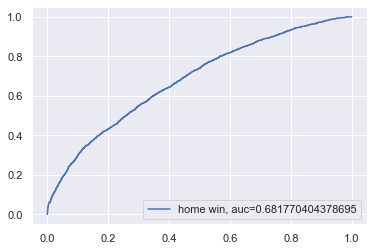

In [86]:
auc = roc_auc_score(y_test,model.predict(X_test) )
plt.plot(fpr,tpr,label="home win, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Not relevant now

### Transform scores

In [66]:
data_to_test = X_test.copy()
data_to_test['home_win_flag'] = y_test
data_to_test

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,home_win_flag
41558,0.048780,0.230769,0.277778,0.285714,0.269231,0.2,0.333333,0.411765,0.380952,0.377778,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3027,0.439024,0.230769,0.277778,0.238095,0.192308,0.1,0.133333,0.176471,0.190476,0.288889,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
8249,0.048780,0.000000,0.111111,0.095238,0.192308,0.2,0.133333,0.235294,0.333333,0.177778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16742,0.243902,0.153846,0.166667,0.142857,0.153846,0.1,0.066667,0.117647,0.095238,0.155556,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
39326,0.390244,0.076923,0.222222,0.238095,0.192308,0.2,0.133333,0.235294,0.238095,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42138,0.439024,0.000000,0.111111,0.095238,0.115385,0.1,0.066667,0.117647,0.142857,0.155556,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
53529,0.853659,0.076923,0.277778,0.238095,0.269231,0.1,0.066667,0.117647,0.095238,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
45997,0.682927,0.153846,0.222222,0.238095,0.346154,0.2,0.133333,0.176471,0.238095,0.311111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
50355,0.439024,0.076923,0.111111,0.190476,0.230769,0.2,0.200000,0.235294,0.285714,0.488889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [67]:

x = model.predict(X_test).reshape(-1, 1)

x_norm = pre.MinMaxScaler().fit_transform(x)
pred_alter = 1-x_norm
data_to_test['pred_alt'] = pred_alter

201/201 [==============================] - 0s 732us/step


In [68]:
maxi = 0
maxi_list = []

for i in range(0,99):
    
    for x in range(0,99):

        data_to_test["pred_w_odds"] =  np.where((data_to_test["home_win_prob"] > i/100) &
                                                (data_to_test["pred_alt"] >= x/100),
                                                (data_to_test["home_win_prob"] + data_to_test["pred_alt"])/2,
                                                np.where((data_to_test["home_win_prob"] > i/100) &
                                                         (data_to_test["pred_alt"] < x/100),
                                                          data_to_test["home_win_prob"],
                                                          data_to_test["pred_alt"]
                                                ))
    
        acc = sum(data_to_test["home_win_flag"] == (data_to_test["pred_w_odds"] > 0.5).astype(int)) / len(data_to_test)
        
        if acc > maxi:
            maxi = acc
            maxi_list = []
            maxi_list.append(i)
            maxi_list.append(x)
            maxi_list.append(acc)

KeyError: 'home_win_prob'

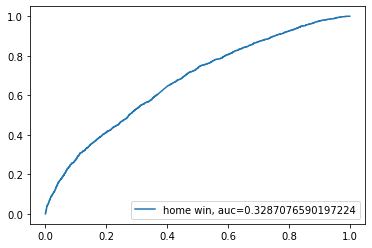

In [29]:
auc = roc_auc_score(data_to_test['home_win_flag'],data_to_test['pred_w_odds'])
plt.plot(fpr,tpr,label="home win, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [30]:
maxi

0.6366895261845387

In [31]:
maxi_list

[0, 98, 0.6366895261845387]

In [32]:
i = 0
x = 98

data_to_test["pred_w_odds"] =  np.where((data_to_test["home_win_prob"] > i/100) &
                                        (data_to_test["pred_alt"] >= x/100),
                                        (data_to_test["home_win_prob"] + data_to_test["pred_alt"])/2,
                                        np.where((data_to_test["home_win_prob"] > i/100) &
                                                 (data_to_test["pred_alt"] < x/100),
                                                  data_to_test["home_win_prob"],
                                                  data_to_test["pred_alt"]))

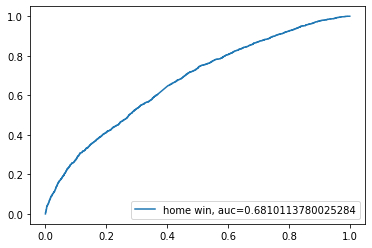

In [33]:
auc = roc_auc_score(data_to_test['home_win_flag'],data_to_test['pred_w_odds'])
plt.plot(fpr,tpr,label="home win, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Text(91.68, 0.5, 'Actual')

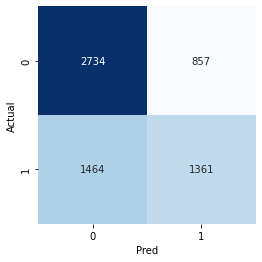

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
 
mat = confusion_matrix(data_to_test["home_win_flag"], data_to_test["home_win_prob"] > 0.5)
labels = ['0', '1']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Pred')
plt.ylabel('Actual')

### Plots

[]

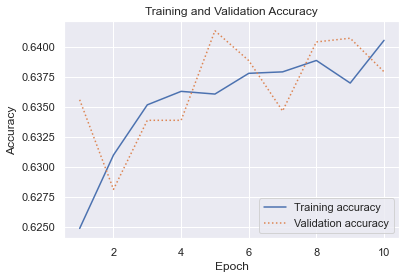

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

201/201 [==============================] - 0s 737us/step


Text(89.18, 0.5, 'Actual')

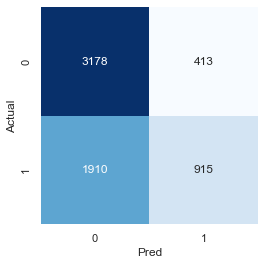

In [70]:

y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['0', '1']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Pred')
plt.ylabel('Actual')

In [71]:
fpr, tpr, thresholds= metrics.roc_curve(y_test, model.predict(X_test),pos_label=1)

201/201 [==============================] - 0s 726us/step


In [72]:
metrics.auc(fpr, tpr)

0.6821776171007657